In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-shapefile/world_shapefile.dbf
/kaggle/input/world-shapefile/world_shapefile.shx
/kaggle/input/world-shapefile/Readme.txt
/kaggle/input/world-shapefile/world_shapefile.shp
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/india-shapefile/INDIA.sbn
/kaggle/input/india-shapefile/INDIA.shp
/kaggle/input/india-shapefile/INDIA.shx
/kaggle/input/india-shapefile/INDIA.sbx
/kaggle/input/india-shapefile/INDIA.dbf
/kaggle/input/india-shapefile/INDIA.prj


In [2]:
countrydata= pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

In [3]:

countrydata.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
countrydata.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [5]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
countrydata.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [7]:
countrydata['AverageTemperature'].isnull().sum()/len(countrydata)

0.05654224866744478

About 5.6% of the values in average temperature coloumn are missing.
Plotting the average temperature variable to get a better picture.

(-20.0, 40.0)

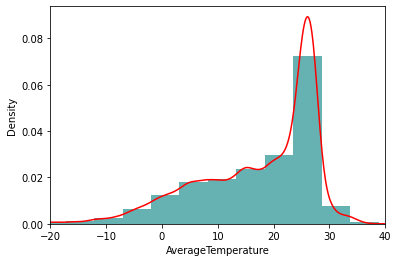

In [8]:
ax=countrydata['AverageTemperature'].hist(bins=15, density=True,  color='teal', alpha=0.6, grid='true')
countrydata['AverageTemperature'].plot(kind='density', color='red')
ax.set(xlabel='AverageTemperature')
plt.xlim(-20, 40)

In [9]:
plotbydt = countrydata.set_index('dt')['AverageTemperature'].isnull().reset_index().groupby('dt').sum()
plotbydt.columns = ['Missing values']


Setting dt as an index to display the missing values in avg temperature coloumn.
Reset the index to make dt a new coloumn so that only unique values are displayed.

In [10]:
print(plotbydt)

            Missing values
dt                        
1743-11-01               0
1743-12-01              50
1744-01-01              50
1744-02-01              50
1744-03-01              50
...                    ...
2013-05-01               1
2013-06-01               1
2013-07-01               1
2013-08-01               1
2013-09-01             222

[3239 rows x 1 columns]


<AxesSubplot:xlabel='dt'>

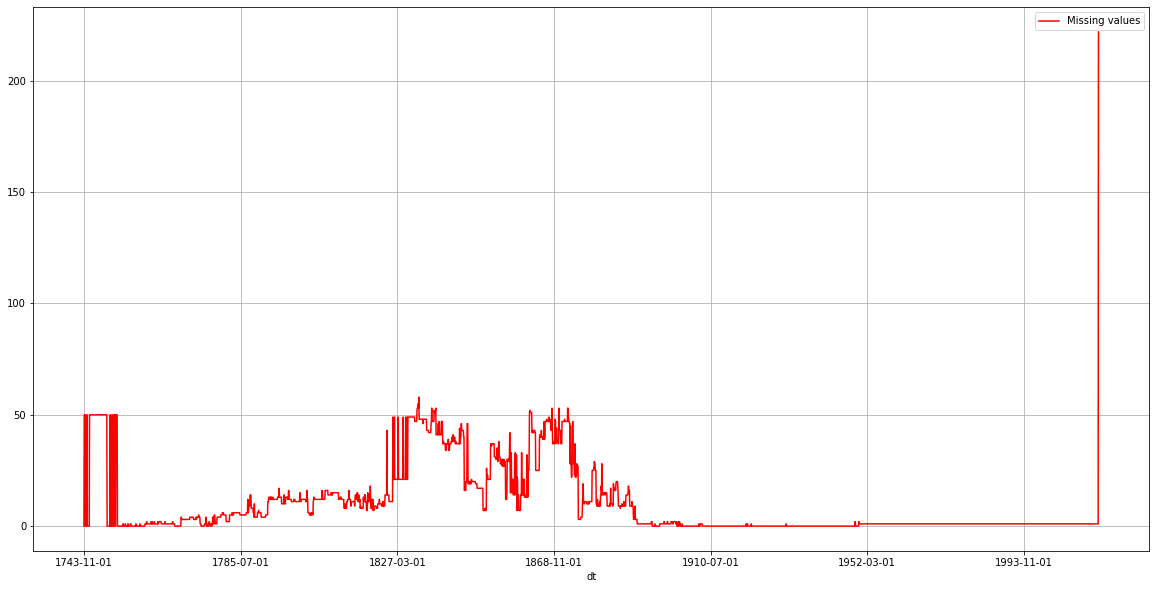

In [11]:
plotbydt.plot(figsize=(20,10), color='red', grid=True)

Highest concentration of missing values in the 19th century.

In [12]:
countrydata['AverageTemperature'].median()

20.901

The median value of the avg temperatures comes as 20.91.
If the temperature is missing in any row the value will be imputed with median value 20.91.

In [13]:
trainingdata= countrydata.copy()
trainingdata['AverageTemperature'].fillna(countrydata['AverageTemperature'].median(skipna=True), inplace=True)


In [14]:
trainingdata.isnull().sum()

dt                                   0
AverageTemperature                   0
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [15]:
trainingdata.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,20.901,NaN,Åland
2,1744-01-01,20.901,NaN,Åland
3,1744-02-01,20.901,NaN,Åland
4,1744-03-01,20.901,NaN,Åland


In [16]:
ax= trainingdata.set_index('dt')['AverageTemperature'].groupby('dt').mean()
bx= trainingdata.set_index('dt')['AverageTemperature'].groupby('dt').median()


In [17]:
print(ax)

dt
1743-11-01     5.184140
1743-12-01    20.901000
1744-01-01    20.901000
1744-02-01    20.901000
1744-03-01    20.901000
                ...    
2013-05-01    21.475675
2013-06-01    22.736922
2013-07-01    23.461132
2013-08-01    23.287992
2013-09-01    21.260860
Name: AverageTemperature, Length: 3239, dtype: float64


In [18]:
print(bx)

dt
1743-11-01     5.5565
1743-12-01    20.9010
1744-01-01    20.9010
1744-02-01    20.9010
1744-03-01    20.9010
               ...   
2013-05-01    24.4600
2013-06-01    25.1010
2013-07-01    24.9110
2013-08-01    24.7930
2013-09-01    20.9010
Name: AverageTemperature, Length: 3239, dtype: float64


<AxesSubplot:xlabel='dt'>

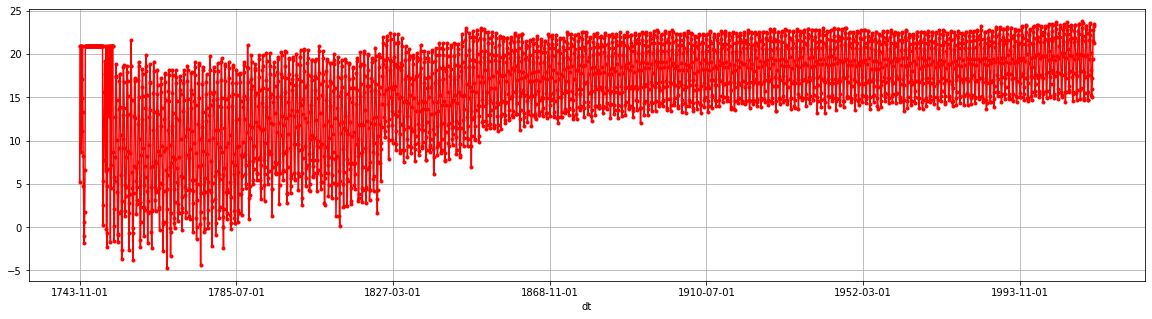

In [19]:
ax.plot(figsize=(20,5), grid=True, marker='.', color='red')


The above graph denotes the mean temperatures of countries worldwide and as evident there has been a steady rise in temperatures around the globe taking effect in the mid 1850s.

<AxesSubplot:xlabel='dt'>

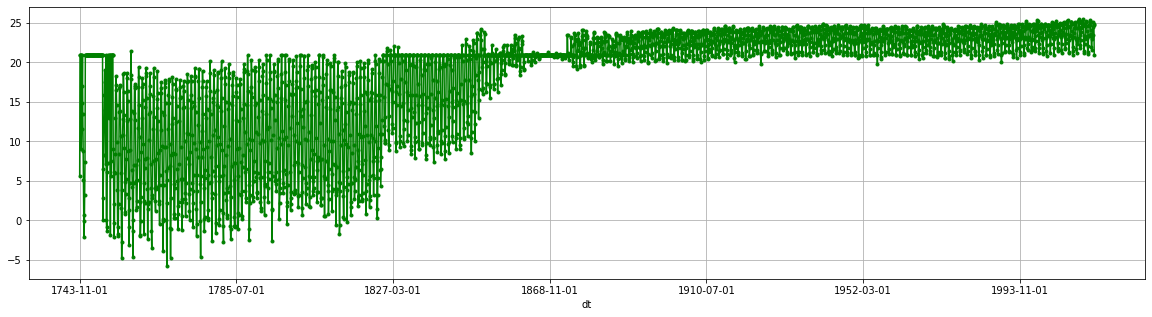

In [20]:
bx.plot(figsize=(20,5), grid=True, marker='.', color='green')

The median graph gives a much more interesting information showing us that the median temperatures rose exponentially in the mid 1850s and at the same time the deviation form the median temperature also started decreasing.

Lets now find out the countries with the highest avg temperatures and plot the temperature trends

Text(0.5, 1.0, 'Countries with Highest Average temperature in 2013')

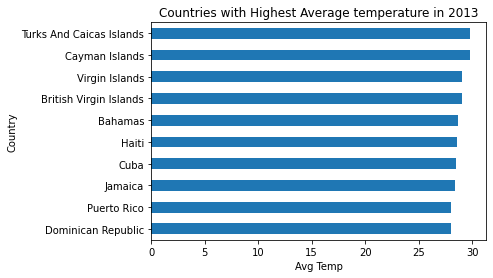

In [21]:
ax = trainingdata.groupby(['Country'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
ax.set_xlabel("Avg Temp")
plt.title("Countries with Highest Average temperature in 2013")

Text(0.5, 1.0, 'Countries with Highest Average temperature in 1700s')

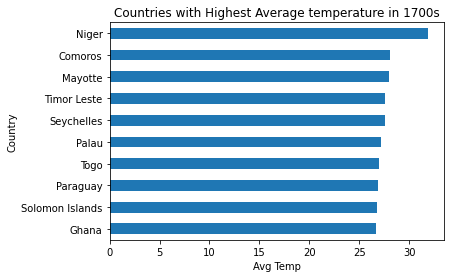

In [22]:
ax = trainingdata.groupby(['Country'])['AverageTemperature'].first().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
ax.set_xlabel("Avg Temp")
plt.title("Countries with Highest Average temperature in 1700s")

From here on I will use only the years for a  clearer picture as having multiple dates cause a lot of clutter.

In [23]:
trainingdata['dt'] = pd.to_datetime(trainingdata['dt'])
trainingdata['year'] = trainingdata['dt'].map(lambda x: x.year)


In [24]:
minyear=trainingdata['year'].min()
maxyear=trainingdata['year'].max()
years=range(minyear,maxyear+1)

Text(0.5, 1.0, 'Average temp trend for Niger')

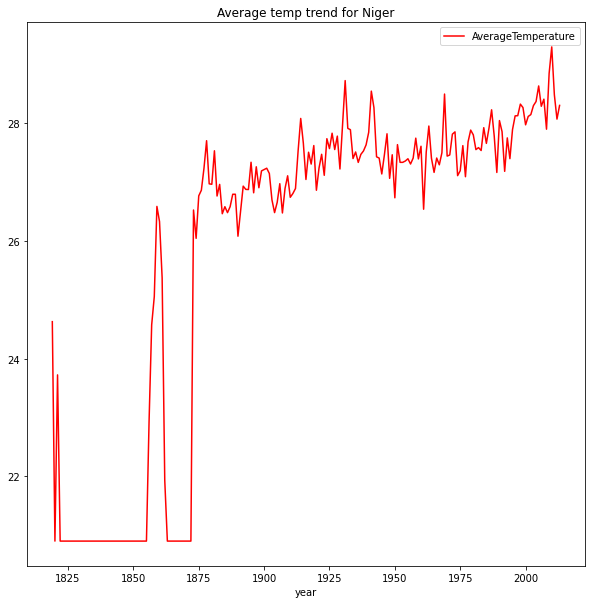

In [25]:
tempniger=trainingdata[trainingdata['Country']=='Niger']
yearwiseplot=tempniger.groupby('year')['AverageTemperature'].mean().reset_index()
yearwiseplot.plot(kind='line',x='year', y='AverageTemperature',figsize=(10,10),color='red')
plt.title('Average temp trend for Niger')

Text(0.5, 1.0, 'Avg temp trend for the Cayman Islands')

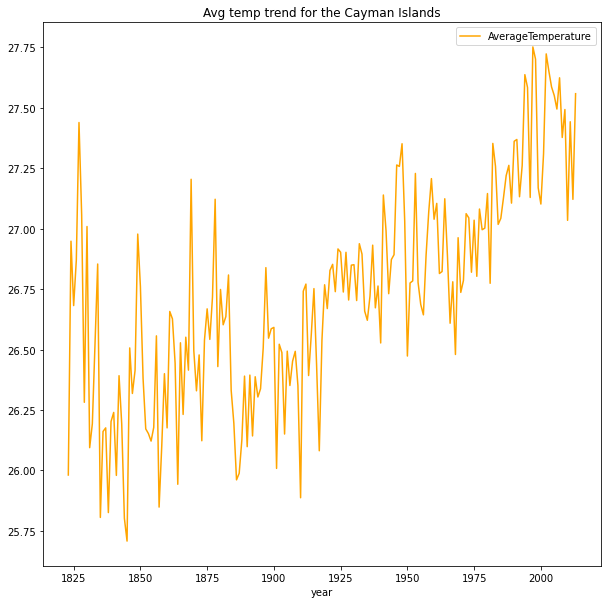

In [26]:
temptci=trainingdata[trainingdata['Country']=='Cayman Islands']
yearplot=temptci.groupby('year')['AverageTemperature'].mean().reset_index()
yearplot.plot(kind='line',x='year', y='AverageTemperature',figsize=(10,10),color='orange')
plt.title('Avg temp trend for the Cayman Islands')

Text(0.5, 1.0, 'Countries with lowest average temperature in 2013')

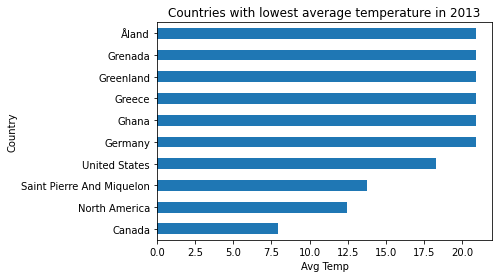

In [27]:
ax = trainingdata.groupby(['Country'])['AverageTemperature'].last().sort_values(ascending=False).tail(10).sort_values().plot(kind='barh')
ax.set_xlabel("Avg Temp")
plt.title('Countries with lowest average temperature in 2013')

Text(0.5, 1.0, 'Avg temperature trend for the US')

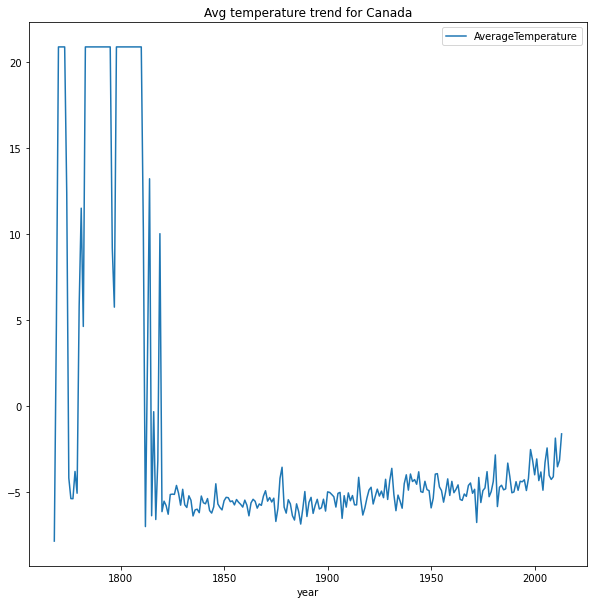

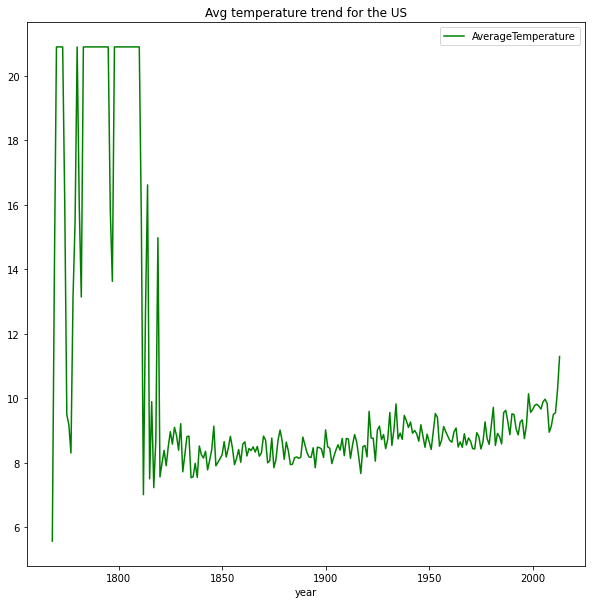

In [28]:
tempcan=trainingdata[trainingdata['Country']=='Canada']
yearplot=tempcan.groupby('year')['AverageTemperature'].mean().reset_index()
yearplot.plot(kind='line',x='year',y='AverageTemperature',figsize=(10,10))
plt.title('Avg temperature trend for Canada')



tempus=trainingdata[trainingdata['Country']=='United States']
yearplot=tempus.groupby('year')['AverageTemperature'].mean().reset_index()
yearplot.plot(kind='line',x='year',y='AverageTemperature',figsize=(10,10), color='green')
plt.title('Avg temperature trend for the US')

Text(0.5, 1.0, 'Avg temperature trend for India')

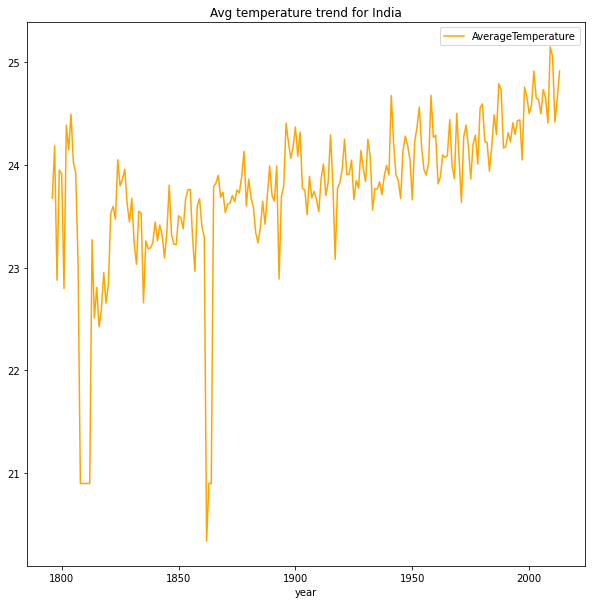

In [29]:
temind=trainingdata[trainingdata['Country']=='India']
yearplot=temind.groupby('year')['AverageTemperature'].mean().reset_index()
yearplot.plot(kind='line',x='year',y='AverageTemperature',figsize=(10,10), color='orange')
plt.title('Avg temperature trend for India')

Something to note: The general trend noticed in these graphs being that of  huge fluctuating ranges before the 1800s and becomes relatively more stable after the 1800s. This could be due to meteorological advancements which took place in the 1800s beacuse of which the values became more accurate and reliable.

" The first national weather forecasting service in the United States (the predecessor of the Weather Bureau) was in fact formed, in 1870, in response to the need for storm warnings on the Great Lakes. Increase Lapham of Milwaukee urged Congress to take action to reduce the loss of hundreds of lives incurred each year by Great Lakes shipping during the 1860s. The effectiveness of the warnings and other forecasts assured the future of the American public weather service."
 -- https://www.britannica.com/science/weather-forecasting/Principles-and-methodology-of-weather-forecasting

In [30]:
countries = trainingdata['Country'].unique()
max_min = []

In [31]:
for country in countries:
    curr_temps = trainingdata[trainingdata['Country'] == country]['AverageTemperature']
    max_min.append((curr_temps.max(), curr_temps.min()))

In [32]:
differences = []

for tpl in max_min:
    differences.append(tpl[0] - tpl[1])

In [33]:
differences, countries = (list(x) for x in zip(*sorted(zip(differences, countries), key=lambda pair: pair[0], reverse=True)))

Text(0.5, 1.0, 'Countries with the highest temperature difference')

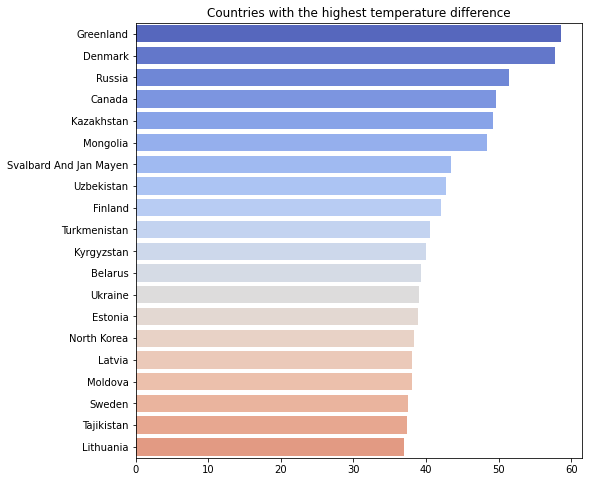

In [34]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:20], y=countries[:20], palette=sns.color_palette("coolwarm", 25), ax=ax )
plt.title('Countries with the highest temperature difference')

These are the top 20 countries with the highest difference in their avg temperatutes over the last 200 years.

Lets visualise the temperature changes of some of these.

Text(0.5, 1.0, 'Average rise in temperature of Greenland')

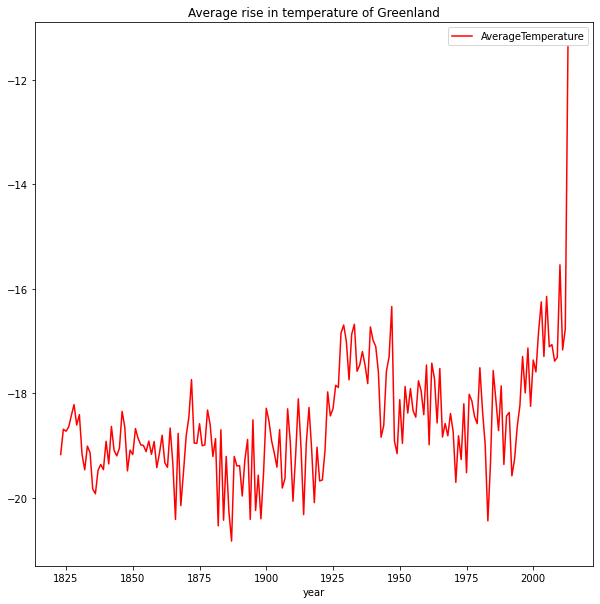

In [35]:
trendgl=trainingdata[trainingdata['Country']=='Greenland']
plotgl=trendgl.groupby('year')['AverageTemperature'].mean().reset_index()
plotgl.plot(figsize=(10,10), kind='line', x='year', y='AverageTemperature', color='red')
plt.title('Average rise in temperature of Greenland')

The temperature which was around -20 deg celcius in the 1800s has now gone upto around -10 deg celcius. Its around 10 degrees rise in the avg temperature!

Text(0.5, 1.0, 'Average rise in temperature of Russia')

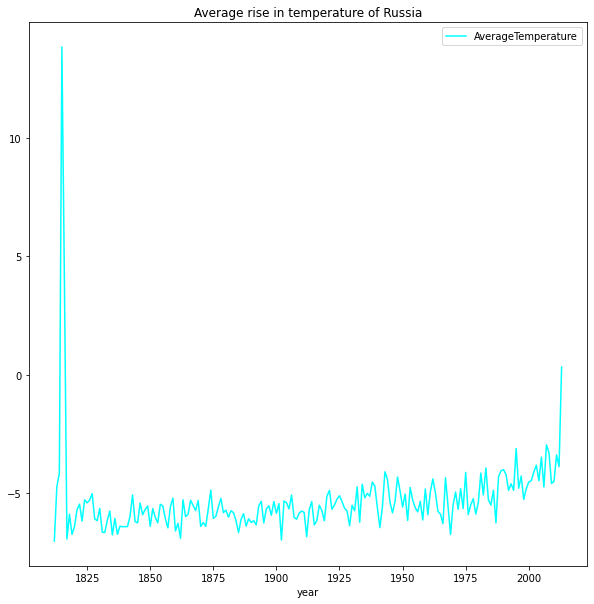

In [36]:
trendrus=trainingdata[trainingdata['Country']=='Russia']
plotgl=trendrus.groupby('year')['AverageTemperature'].mean().reset_index()
plotgl.plot(figsize=(10,10), kind='line', x='year', y='AverageTemperature', color='cyan')
plt.title('Average rise in temperature of Russia')

Ignoring the sudden spike at the beginning the temperatues which were around -8 deg celcius in the 1800s have gradually risen and have spiked suddenly after the 2000s.

Text(0.5, 1.0, 'Average rise in temperature of Mongolia')

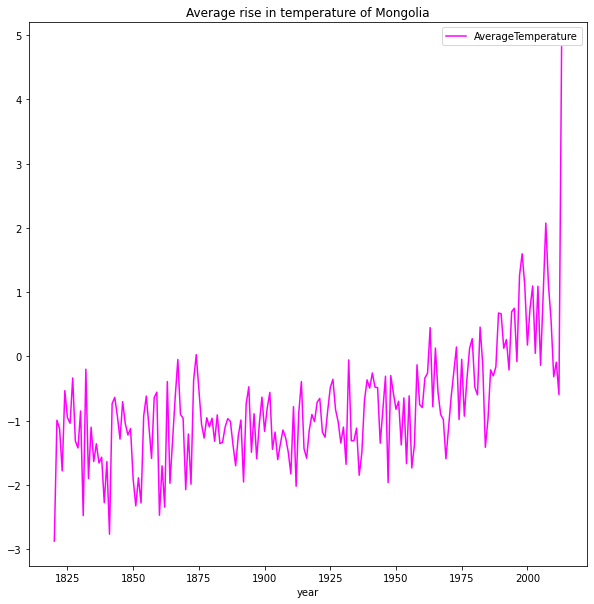

In [37]:
trendmon=trainingdata[trainingdata['Country']=='Mongolia']
plotgl=trendmon.groupby('year')['AverageTemperature'].mean().reset_index()
plotgl.plot(figsize=(10,10), kind='line', x='year', y='AverageTemperature', color='magenta')
plt.title('Average rise in temperature of Mongolia')

This one tells a similar story where the temperatures have spiked after the 2000s.

Lets now try to visualise the global temperature changes over the last 200 years on a world map. For this I will merge the differences and countries list I created before and use the merged dataset to plot the map.

In [38]:
tuple=list(zip(countries,differences))
tuple
worldtempdiff=pd.DataFrame(tuple,columns=['Country','Difference'])
worldtempdiff

,Country,Difference
0,Greenland,58.559
1,Denmark,57.731
2,Russia,51.478
3,Canada,49.637
4,Kazakhstan,49.163
...,...,...
238,Burundi,5.077
239,Papua New Guinea,5.028
240,Rwanda,4.782
241,Ecuador,4.567


In [39]:
world_map=gpd.read_file('/kaggle/input/world-shapefile/world_shapefile.shp')
merged=world_map.set_index('NAME').join(worldtempdiff.set_index('Country'))

Text(0.5, 1.0, 'Average change in temperature around the world')

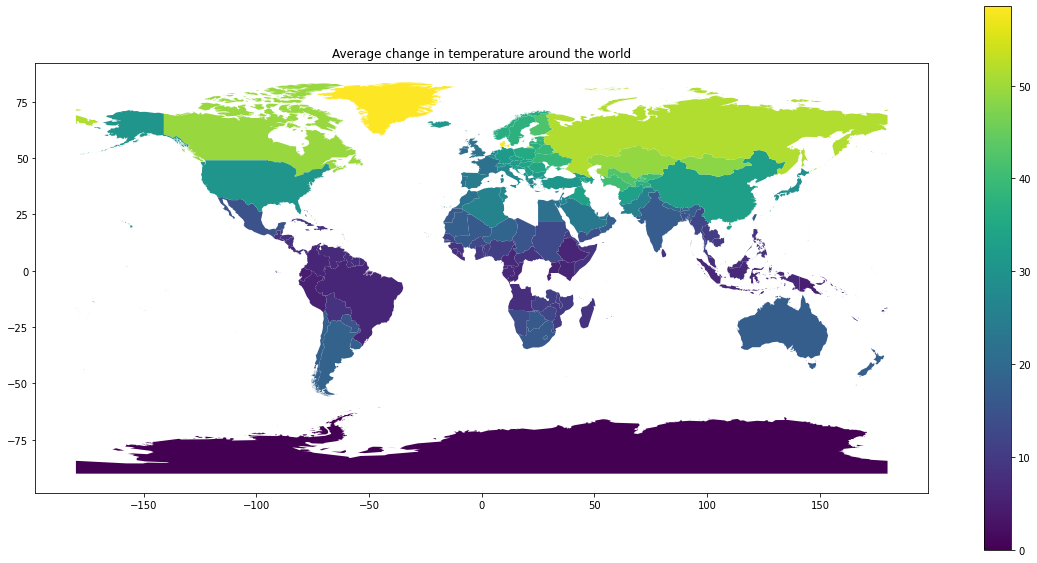

In [40]:
merged.plot(column='Difference',figsize=(20,10),legend=True)
plt.title('Average change in temperature around the world')

From the above map it is clear that the countries further up in the north had experienced a more severe change in their average temperatures while near the equator the average temperatures haven't changed much at all. The countries near the Arctic circle have experienced a severe rise in temperature most notably Greenland, Russia, Canada, while down to the South, Antarctica hasn't experienced such a drastic temperature change.

In [41]:
world=trainingdata.groupby('Country')['AverageTemperature'].mean().reset_index()
world.sort_values('AverageTemperature',inplace=True)
world.head()

,Country,AverageTemperature
88,Greenland,-18.570207
58,Denmark,-18.036033
210,Svalbard And Jan Mayen,-7.214356
180,Russia,-5.347257
39,Canada,-1.335864


In [42]:
merged=world_map.set_index('NAME').join(world.set_index('Country'))

Text(0.5, 1.0, 'Average temperatures of the world for a period of 200 years')

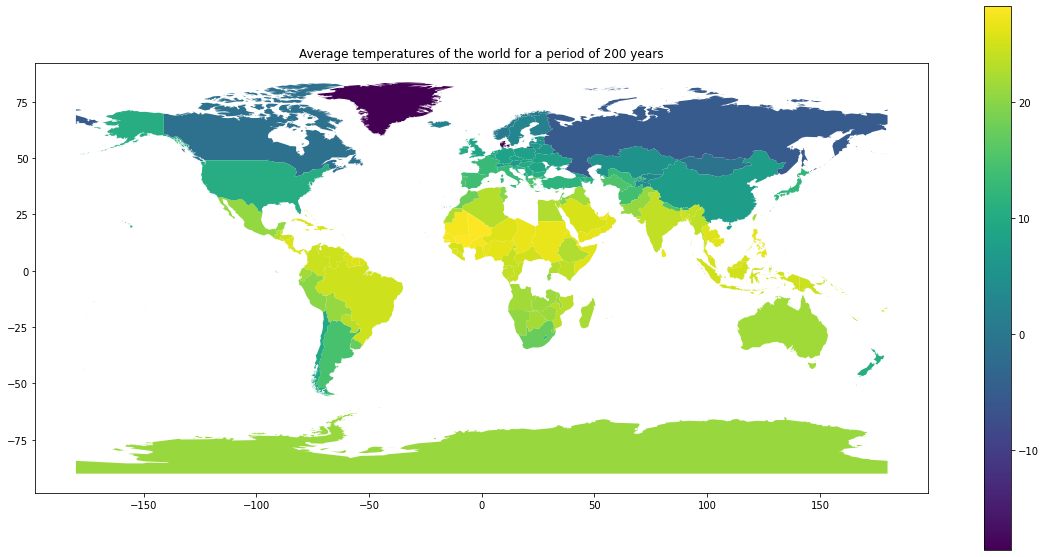

In [43]:
merged.plot(column='AverageTemperature',figsize=(20,10),legend=True)
plt.title('Average temperatures of the world for a period of 200 years')